In [41]:
from sklearn import datasets, cluster, metrics
from sklearn.preprocessing import scale
from sklearn import decomposition
from plotly.subplots import make_subplots
from scipy.stats import mode
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import plot_roc_curve, classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import time as time

In [42]:
data = datasets.load_digits()
n = 0
m = 0
for x in data.data:
  for y in x:
    if y == 0:
      n += 1
    else:
      m += 1
print ("There are ", n, " 0s, and ", m, " not 0s.")

There are  56272  0s, and  58736  not 0s.


# **DATASET: Digits**

In [43]:
digits_data = datasets.load_digits()
X_digits = scale(digits_data.data)
y_digits = digits_data.target
pca_digits = decomposition.TruncatedSVD(n_components=40)
new_digits_data = pca_digits.fit(X_digits).transform(X_digits)
print (pca_digits.explained_variance_ratio_, sum(pca_digits.explained_variance_ratio_))

[0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.03389381 0.02998221 0.02932003 0.02781805 0.02577055
 0.02275303 0.0222718  0.02165229 0.01914167 0.01775547 0.01638069
 0.0159646  0.01489191 0.0134797  0.01271931 0.01165837 0.01057647
 0.00975316 0.00944559 0.00863014 0.00836643 0.00797693 0.00746471
 0.0072558  0.00691911 0.00653908 0.00640791 0.00591382 0.00571157
 0.00523615 0.004818   0.00453631 0.00422793] 0.9507741158236755


# **Explained variance**

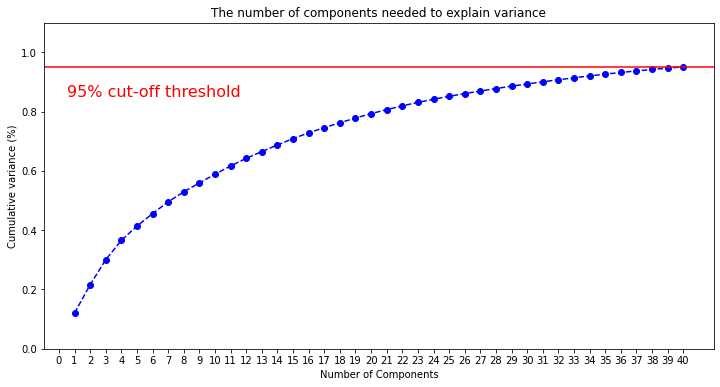

In [44]:
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, len(pca_digits.explained_variance_ratio_)+1, step=1)
y = np.cumsum(pca_digits.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(pca_digits.explained_variance_ratio_)+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.show()

# **Reconstruction error**

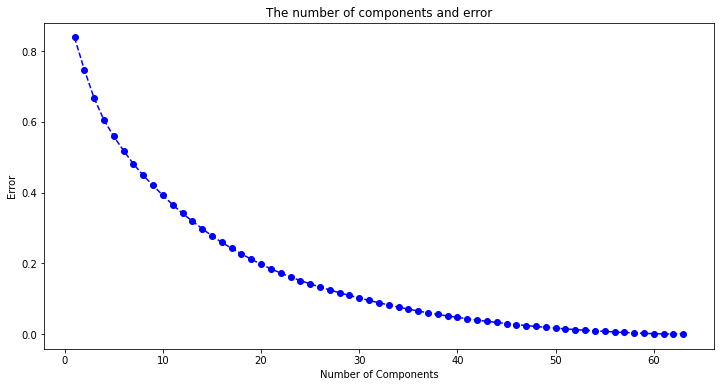

In [45]:
r = list(range(1,64))
loss = []
for i in r:
  pca = decomposition.TruncatedSVD(n_components=i)
  l = pca.fit_transform(X_digits)
  m = pca.inverse_transform(l)
  loss.append(((X_digits - m)**2).mean())
plt.xlabel("Number of Components")
plt.ylabel("Error")
plt.title('The number of components and error')  
plt.plot(r, loss, marker='o', linestyle='--', color='b')

# **Kmean--digits**

In [46]:
digits_kmean = cluster.KMeans(n_clusters=10, max_iter=200)
digits_clusters = digits_kmean.fit_predict(new_digits_data)
digits_labels = np.zeros_like(digits_clusters)
for i in range(10):
    mask = (digits_clusters == i)
    digits_labels[mask] = mode(y_digits[mask])[0]
digits_accuracy = metrics.accuracy_score(y_digits, digits_labels)
print (digits_accuracy)

0.7100723427935448


# **EM--digits**

In [47]:
digits_EM = GaussianMixture(n_components=10, max_iter=200)
digits_clusters = digits_EM.fit_predict(new_digits_data)
digits_labels = np.zeros_like(digits_clusters)
for i in range(10):
    mask = (digits_clusters == i)
    digits_labels[mask] = mode(y_digits[mask])[0]
digits_accuracy = metrics.accuracy_score(y_digits, digits_labels)
print (digits_accuracy)

0.7267668336115748


# **NN--digits**

In [48]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        62
           1       0.98      0.97      0.97        58
           2       0.98      1.00      0.99        49
           3       0.96      0.96      0.96        69
           4       0.98      0.89      0.93        56
           5       0.96      0.98      0.97        54
           6       0.97      1.00      0.98        61
           7       0.98      1.00      0.99        59
           8       0.95      0.95      0.95        55
           9       0.92      0.96      0.94        71

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594

0.9663299663299664
--- 2.444542646408081 seconds ---


# **NN--digits--TruncatedSVD**

In [49]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(new_digits_data, y_digits, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.95      0.95      0.95        59
           2       0.98      0.98      0.98        66
           3       0.98      1.00      0.99        55
           4       1.00      1.00      1.00        66
           5       0.98      0.98      0.98        57
           6       1.00      1.00      1.00        64
           7       0.98      0.98      0.98        54
           8       0.94      0.95      0.94        61
           9       0.98      0.95      0.97        61

    accuracy                           0.98       594
   macro avg       0.98      0.98      0.98       594
weighted avg       0.98      0.98      0.98       594

0.9797979797979798
--- 2.6359455585479736 seconds ---


# **NN--digits--clusters--data**

In [50]:
u = np.concatenate((X_digits, digits_clusters.reshape(-1, 1)), axis=1)
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(u, y_digits, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.94      0.97      0.95        62
           2       1.00      0.97      0.98        61
           3       0.98      0.98      0.98        57
           4       0.99      1.00      0.99        69
           5       0.98      0.96      0.97        53
           6       0.95      0.98      0.97        63
           7       0.98      0.97      0.97        60
           8       0.95      0.92      0.93        59
           9       0.93      0.95      0.94        56

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594

0.9696969696969697
--- 2.2378382682800293 seconds ---


# **NN--digits--clusters**

In [51]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(digits_clusters.reshape(-1, 1), y_digits, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       0.36      0.53      0.43        55
           2       0.75      0.80      0.78        50
           3       0.38      0.83      0.52        59
           4       1.00      0.83      0.91        54
           5       0.55      0.73      0.62        55
           6       0.85      0.98      0.91        58
           7       0.84      0.91      0.87        65
           8       0.00      0.00      0.00        53
           9       0.00      0.00      0.00        69

    accuracy                           0.66       594
   macro avg       0.57      0.66      0.60       594
weighted avg       0.58      0.66      0.61       594

0.664983164983165
--- 3.1565847396850586 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# **DATASET: Wine**

In [52]:
wine_data = datasets.load_wine()
X_wine = scale(wine_data.data)
y_wine = wine_data.target
pca_wine = decomposition.TruncatedSVD(n_components=10)
new_wine_data = pca_wine.fit(X_wine).transform(X_wine)
print (pca_wine.explained_variance_ratio_, sum(pca_wine.explained_variance_ratio_))

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019] 0.9616971684450637


# **Explained variance**

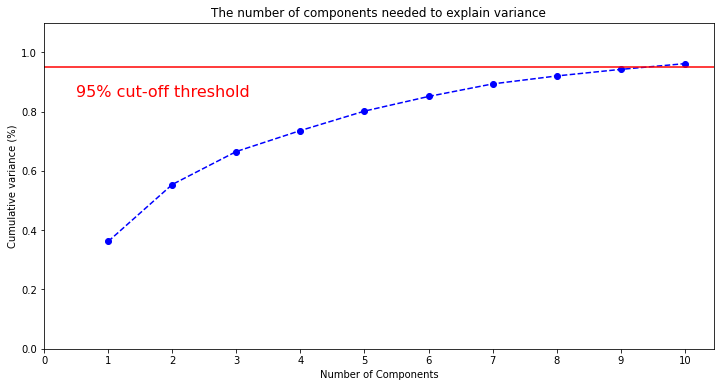

In [53]:
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, len(pca_wine.explained_variance_ratio_)+1, step=1)
y = np.cumsum(pca_wine.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(pca_wine.explained_variance_ratio_)+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.show()

# **Reconstruction error**

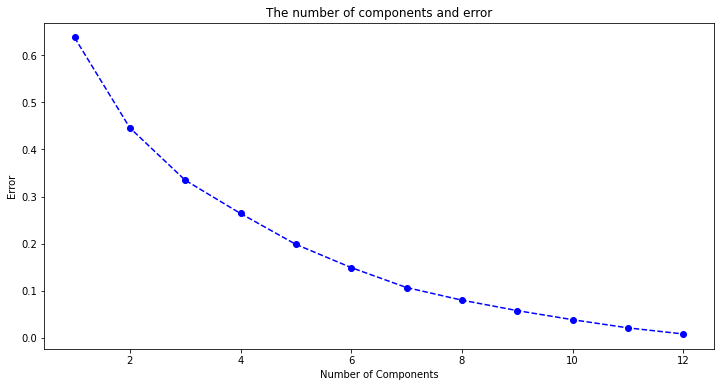

In [54]:
r = list(range(1,13))
loss = []
for i in r:
  pca = decomposition.PCA(n_components=i)
  l = pca.fit_transform(X_wine)
  m = pca.inverse_transform(l)
  loss.append(((X_wine - m)**2).mean())  
plt.xlabel("Number of Components")
plt.ylabel("Error")
plt.title('The number of components and error')
plt.plot(r, loss, marker='o', linestyle='--', color='b')

# **Kmean--wine**

In [55]:
wine_kmean = cluster.KMeans(n_clusters=3, max_iter=200)
wine_clusters = wine_kmean.fit_predict(new_wine_data)
wine_labels = np.zeros_like(wine_clusters)
for i in range(3):
    mask = (wine_clusters == i)
    wine_labels[mask] = mode(y_wine[mask])[0]
wine_accuracy = metrics.accuracy_score(y_wine, wine_labels)
print (wine_accuracy)

0.9662921348314607


# **EM--wine**

In [56]:
wine_EM = GaussianMixture(n_components=3, max_iter=200)
wine_clusters = wine_EM.fit_predict(new_wine_data)
wine_labels = np.zeros_like(wine_clusters)
for i in range(3):
    mask = (wine_clusters == i)
    wine_labels[mask] = mode(y_wine[mask])[0]
wine_accuracy = metrics.accuracy_score(y_wine, wine_labels)
print (wine_accuracy)

0.9887640449438202


# **NN--wine**

In [57]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       0.95      0.86      0.90        21
           2       1.00      0.95      0.97        19

    accuracy                           0.93        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.94      0.93      0.93        59

0.9322033898305084
--- 0.23690152168273926 seconds ---


# **NN--wine--TruncatedSVD**

In [58]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(new_wine_data, y_wine, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.96      0.98        26
           2       0.89      1.00      0.94         8

    accuracy                           0.98        59
   macro avg       0.96      0.99      0.97        59
weighted avg       0.98      0.98      0.98        59

0.9830508474576272
--- 0.25699400901794434 seconds ---


# **NN--wine--clusters--data**

In [59]:
u = np.concatenate((X_wine, wine_clusters.reshape(-1, 1)), axis=1)
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(u, y_wine, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.96      0.98        23
           2       0.94      1.00      0.97        15

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59

0.9830508474576272
--- 0.21770858764648438 seconds ---


# **NN--wine--clusters**

In [60]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(wine_clusters.reshape(-1, 1), y_wine, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        13

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

1.0
--- 0.3244328498840332 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

